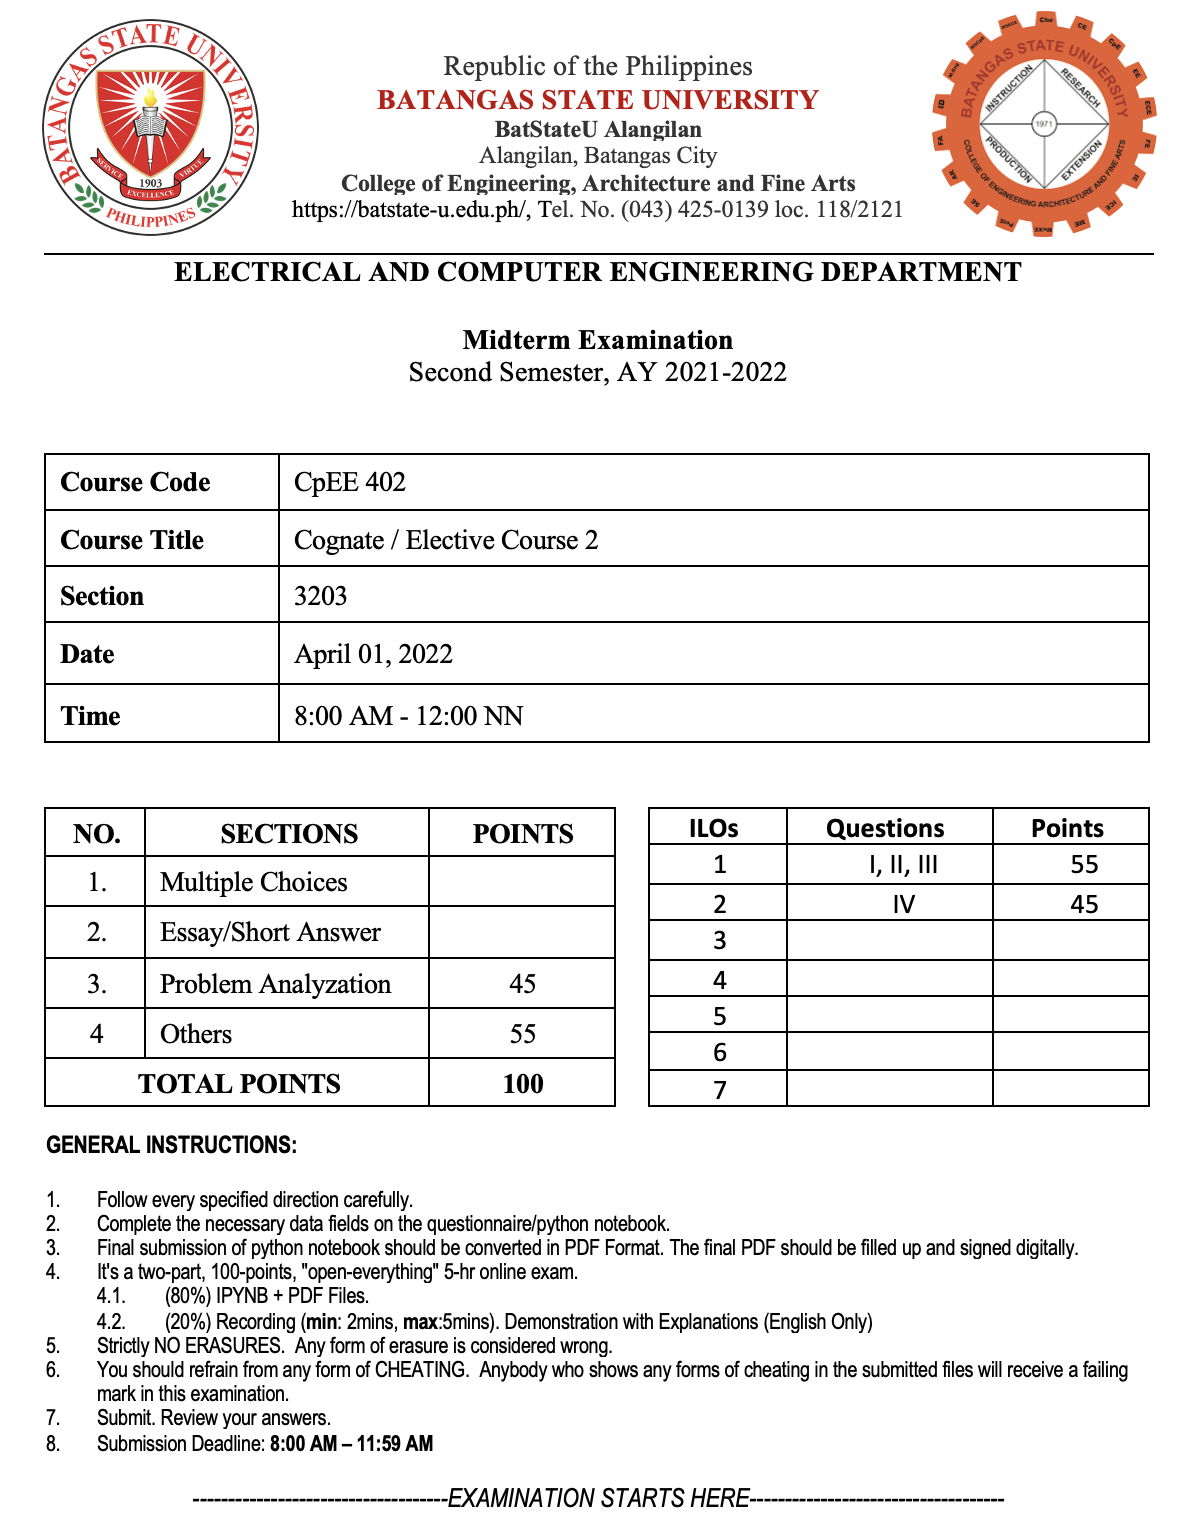

## I. PROBLEM STATEMENT

Crab is very tasty and many countries of the world import huge amount of crabs for consumption every year. The main benefits of crab farming are, labor cost is very low, production cost is comparatively lower and they grow very fast. Commercial crab farming business is developing the lifestyle of the people of coastal areas. By proper care and management we can earn more from crab farming business than shrimp farming. You can raise mud crabs in two systems. Grow out farming and fattening systems. By using Linear Regression, certain qualities can be determined to know if a crab is quality crab.

## II. DATASET DESCRIPTION

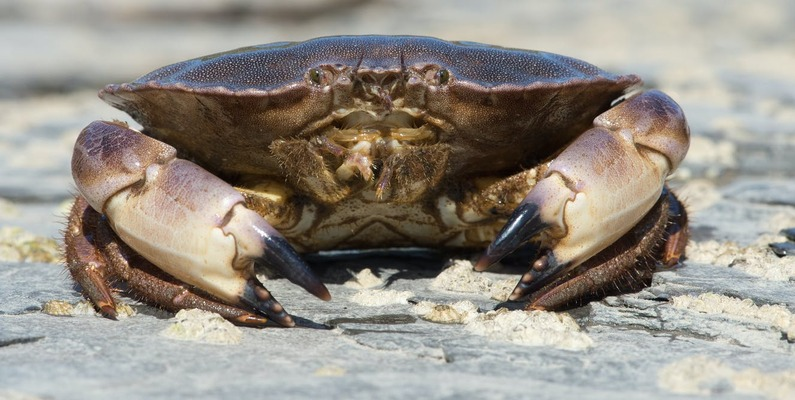

Link for the dataset: [Crab Age Prediction](https://www.kaggle.com/datasets/sidhus/crab-age-prediction)

The dataset is used to estimate the age of the crab based on the physical attributes. Its a great starting point for classical regression analysis and feature engineering and understand the impact of feature engineering in Data Science domain.

Although the dataset is about crab age prediction using physical features, the task given is to predict the crab's diameter by using Linear Regression.

## III. EXPLORATORY DATA ANALYSIS (EDA)

### 1. Read the data

In [61]:
import pandas as pd
import numpy as np

In [62]:
data = pd.read_csv('CrabAgePrediction.csv')

### 2. Get an overview of the dataset:

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


### 3. Print the first five and last five rows of the dataset

In [64]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [65]:
data.tail()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6
3892,I,0.7875,0.6125,0.2125,4.068153,1.502523,1.346601,1.417475,8


### 4. Find the summary statistics of the dataset

In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,3893.0,1.311306,0.300431,0.187500,1.125000,1.362500,1.537500,2.037500
Diameter,3893.0,1.020893,0.248233,0.137500,0.875000,1.062500,1.200000,1.625000
Height,3893.0,0.349374,0.104976,0.000000,0.287500,0.362500,0.412500,2.825000
Weight,3893.0,23.567275,13.891201,0.056699,12.672227,22.792998,32.786197,80.101512
Shucked Weight,3893.0,10.207342,6.275275,0.028349,5.343881,9.539607,14.273973,42.184056
Viscera Weight,3893.0,5.136546,3.104133,0.014175,2.664853,4.861939,7.200773,21.545620
Shell Weight,3893.0,6.795844,3.943392,0.042524,3.713785,6.662133,9.355335,28.491248
Age,3893.0,9.954791,3.220967,1.000000,8.000000,10.000000,11.000000,29.000000


### 5. Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages.

In [67]:
import missingno as msno

In [68]:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Weight,0,0.0
Shucked Weight,0,0.0
Viscera Weight,0,0.0
Shell Weight,0,0.0
Age,0,0.0


### 6. Plot the nullity matrix and nullity correlation heatmap.

In [69]:
import matplotlib.pyplot as plt

No nullity matrix because no columns with missing value. Will get an error if tried.

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


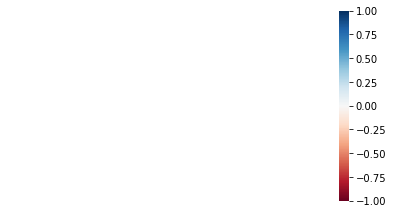

In [70]:
nullable_columns = data.columns[mask.any()].tolist()
msno.heatmap(data[nullable_columns], figsize=(7, 3.5))
plt.show()

### 7. Delete the columns having more than 80% of values missing.

Importing dependencies needed to find features to remove.

In [71]:
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

Encoding `Sex` values into numerical values.

In [72]:
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,2,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,1,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,0,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,1,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


Heatmap to know which values are positiveley correlated to `Diameter`.

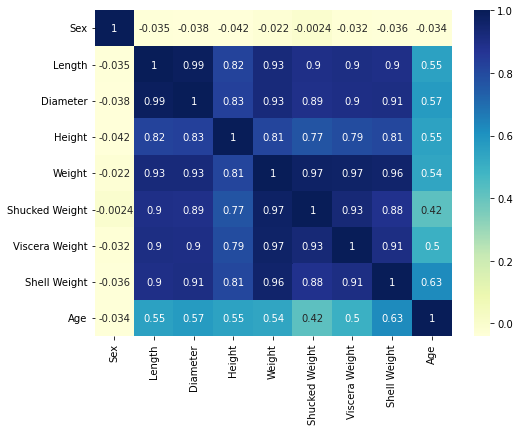

In [73]:
plt.figure(figsize=(8, 6))
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

Remove `Sex` because negatively correlated to `Diameter`.

Dropping unwanted columns.

In [74]:
data = data.drop(['Sex'], axis=1)
data.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


### 8. Impute null values based from the Summary Statistics. Any statistical values can be used for imputation

In [75]:
## NA

### 9. Export the Cleaned Dataset.

In [76]:
data.to_csv('CrabDiameterPrediction.csv', index=False)

## IV.  AI MODELLING - APPLIED REGRESSION ANALYSIS (ARA)

### 1. Import the required dependencies.

In [77]:
from sklearn.linear_model import LinearRegression

### 2. Read the cleaned data.

In [78]:
data_ = pd.read_csv('CrabDiameterPrediction.csv')
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3893 non-null   float64
 1   Diameter        3893 non-null   float64
 2   Height          3893 non-null   float64
 3   Weight          3893 non-null   float64
 4   Shucked Weight  3893 non-null   float64
 5   Viscera Weight  3893 non-null   float64
 6   Shell Weight    3893 non-null   float64
 7   Age             3893 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 243.4 KB


### 3. Construct a multiple linear regression model.

Separating the target column.

In [79]:
target = ['Diameter']
features = data_.columns.tolist()
del features[features.index('Diameter')]

In [80]:
features

['Length',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'Age']

In [81]:
target

['Diameter']

In [82]:
model = LinearRegression()

model.fit(data[features], data[target].values.reshape((-1, 1)))

LinearRegression()

### 4. Compute the performance of the model in terms of the R-squared value. <font color=red>Target Score: 80% and Above </font>.

In [83]:
acc = model.score(data[features], data.Diameter.values.reshape((-1, 1)))
print(acc * 100)

97.61243668196958


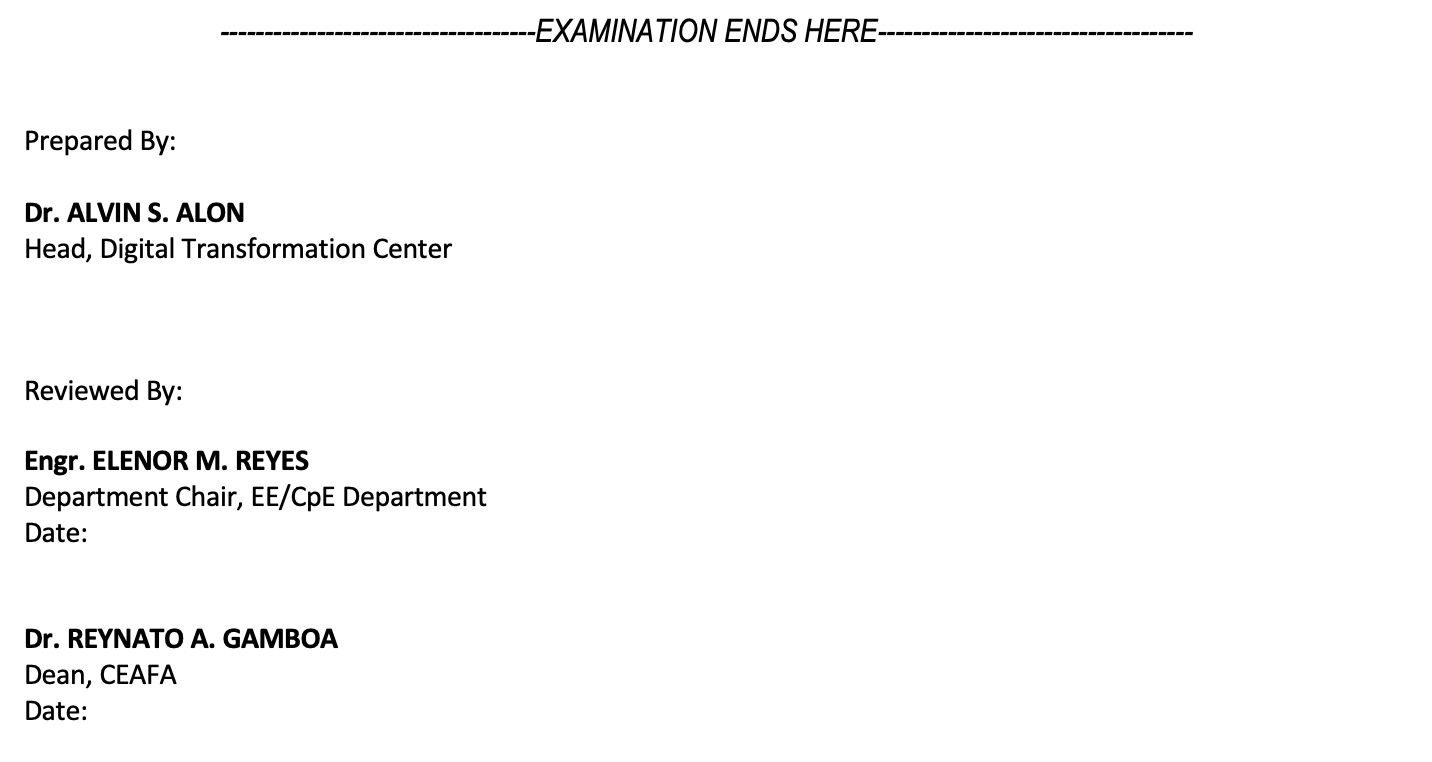